In [8]:
### install theses packages if they are not installed
# !pip install matplotlib
# !pip install yasa
# !pip install mne

import matplotlib.pyplot as plt
import yasa
import mne

import data_visualization as dv

In [9]:
# epoch time in seconds
epoch = 30
# amount of time in minutes you want to use from when the subject is 
# awake before and after any sleep stages occur
wake_time = 30

# path to file containing the psg data you want to visualize
raw_psg = "C:/Users/andri/school/bio-informatics/internship/donders/data/human_test_data/input/raw_input/SC4001E0-PSG.edf"
# path to file containing annotation data
raw_hypno = "C:/Users/andri/school/bio-informatics/internship/donders/data/human_test_data/input/annotation_raw/SC4001EC-Hypnogram.edf"


# visualize the data of the different channels in dataset.
raw_data = dv.read_raw_psg(raw_psg)
anno_data = dv.extract_annotation(raw_hypno, raw_data)
cropped_raw_data, cropped_anno_data = dv.crop_data(anno_data, raw_data)
dv.plot_data(cropped_raw_data)

Extracting EDF parameters from C:\Users\andri\school\bio-informatics\internship\donders\data\human_test_data\input\raw_input\SC4001E0-PSG.edf...
EDF file detected
Channel 'EEG Fpz-Cz' recognized as type EEG (renamed to 'Fpz-Cz').
Channel 'EEG Pz-Oz' recognized as type EEG (renamed to 'Pz-Oz').
Channel 'EOG horizontal' recognized as type EOG (renamed to 'horizontal').
Channel 'Resp oro-nasal' recognized as type RESP (renamed to 'oro-nasal').
Channel 'EMG submental' recognized as type EMG (renamed to 'submental').
Channel 'Temp rectal' recognized as type TEMP (renamed to 'rectal').
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7949999  =      0.000 ... 79499.990 secs...


c:\Users\andri\school\bio-informatics\internship\donders\vsc\Human_SleepSCoring\DilonAndriesse\data_visualization\data_visualization.py:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(
c:\Users\andri\school\bio-informatics\internship\donders\vsc\Human_SleepSCoring\DilonAndriesse\data_visualization\data_visualization.py:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(


Channels marked as bad:
none


Used Annotations descriptions: [np.str_('Sleep stage 1'), np.str_('Sleep stage 2'), np.str_('Sleep stage 3'), np.str_('Sleep stage 4'), np.str_('Sleep stage R'), np.str_('Sleep stage W')]


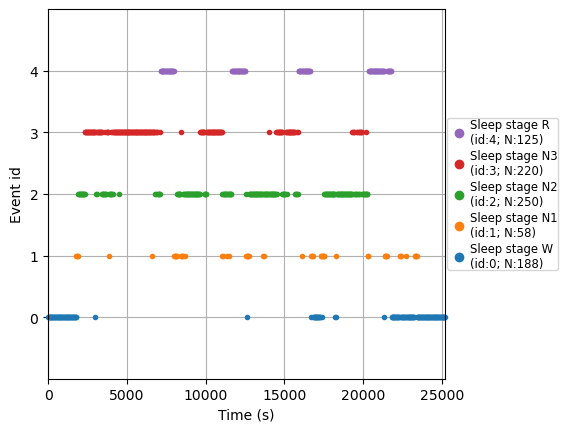

In [10]:
# visualize the distribution of epochs spend in certain sleep state
sleep_events = dv.create_sleep_events(cropped_raw_data, epoch)
dv.plot_events(sleep_events, raw_data)

c:\Users\andri\miniconda3\envs\rodent_model\Lib\site-packages\yasa\plotting.py:89: FutureWarning: 'S' is deprecated and will be removed in a future version. Please use 's' instead of 'S'.
  freq_str = pd.tseries.frequencies.to_offset(pd.Timedelta(1 / sf_hypno, "S")).freqstr
12-Sep-25 14:27:35 | WARNING | Hypnogram is SHORTER than data by 0.01 seconds. Padding hypnogram with last value to match data.size.


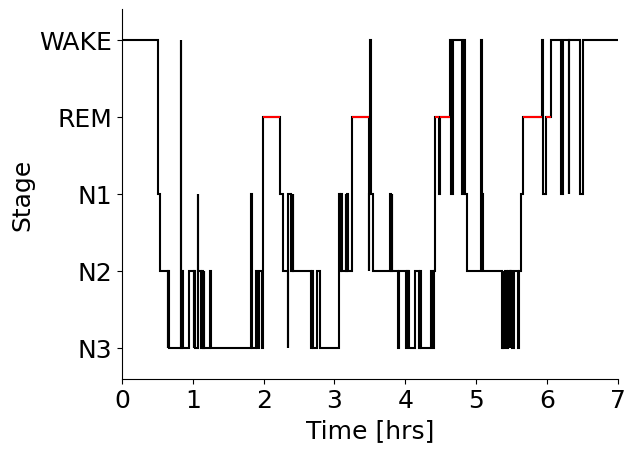

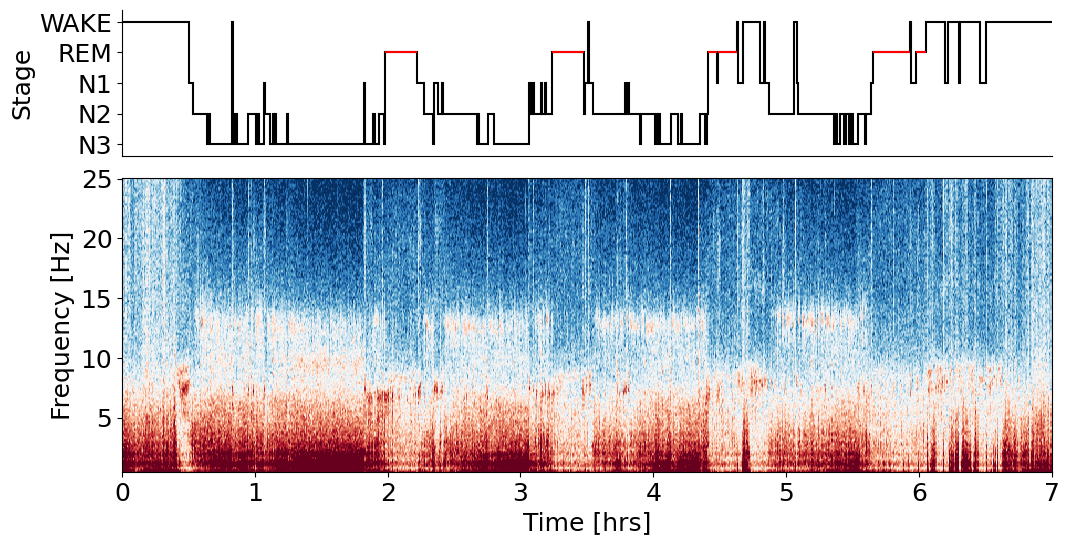

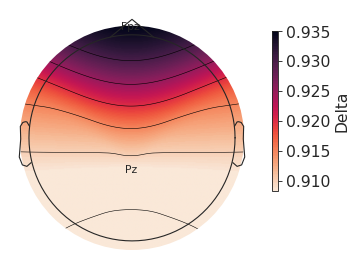

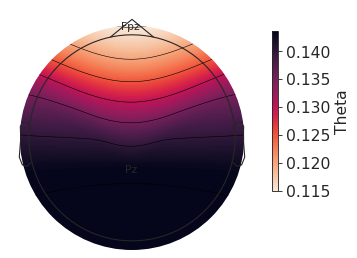

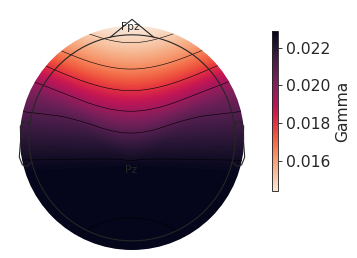

In [11]:
# yasa visualization of hypnogram and spectrogram plot
hypno_up = dv.hypnogram_vis(raw_data, sleep_events)
dv.calc_bandpower(cropped_raw_data, hypno_up)